# Question  -plant task

## 1. Lets import all the libraries 
## 2. Read the dataset and explore the statistics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix,  roc_curve, precision_recall_curve, accuracy_score, roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

plt.style.use('ggplot')
print('Load Libraries-Done')

Load Libraries-Done


In [2]:
df = pd.read_csv('plantpalm.csv')

In [3]:
df

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44
...,...,...,...,...,...,...,...,...,...
125,01.06.2018,498.2,27.213333,21.6,33.6,165.6,24,820758.9147,1.29
126,01.07.2018,494.7,27.074194,21.2,33.5,154.7,26,882254.2254,1.42
127,01.08.2018,478.8,27.016129,20.4,33.6,127.2,25,829488.8199,1.61
128,01.09.2018,481.1,26.946667,21.0,34.2,180.6,23,792101.0471,1.91


In [5]:
# Calculate additional statistics
print("\nAdditional Statistics:")
print("Median:", df.median())
print("Mode:", df.mode().iloc[0])


Additional Statistics:
Median: SoilMoisture        538.300000
Average_Temp         26.930645
Min_Temp             21.500000
Max_Temp             33.900000
Precipitation       182.150000
Working_days         25.000000
HA_Harvested     790036.158050
FFB_Yield             1.585000
dtype: float64
Mode: Date              01.01.2008
SoilMoisture           553.4
Average_Temp       27.035484
Min_Temp                21.5
Max_Temp                34.6
Precipitation          283.2
Working_days            25.0
HA_Harvested     683431.9444
FFB_Yield               1.39
Name: 0, dtype: object


A:\Users\SAM\AppData\Local\Temp\ipykernel_1948\273303623.py:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("Median:", df.median())


In [6]:
print("Standard Deviation:", df.std())
print("Skewness:", df.skew())
print("Kurtosis:", df.kurtosis())

Standard Deviation: SoilMoisture        57.367844
Average_Temp         0.651413
Min_Temp             0.688971
Max_Temp             1.079638
Precipitation       80.237210
Working_days         1.239289
HA_Harvested     34440.893854
FFB_Yield            0.281751
dtype: float64
Skewness: SoilMoisture    -0.394336
Average_Temp    -0.340606
Min_Temp        -1.121358
Max_Temp        -0.215635
Precipitation    0.526227
Working_days    -0.660814
HA_Harvested    -0.064445
FFB_Yield        0.188629
dtype: float64
Kurtosis: SoilMoisture    -0.262867
Average_Temp     0.141138
Min_Temp         2.000500
Max_Temp        -0.591251
Precipitation    1.206761
Working_days     0.565301
HA_Harvested     0.085981
FFB_Yield       -0.670960
dtype: float64


A:\Users\SAM\AppData\Local\Temp\ipykernel_1948\3875569592.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("Standard Deviation:", df.std())
A:\Users\SAM\AppData\Local\Temp\ipykernel_1948\3875569592.py:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("Skewness:", df.skew())
A:\Users\SAM\AppData\Local\Temp\ipykernel_1948\3875569592.py:3: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecat

In [7]:
# Calculate correlation between columns
print("\nCorrelation Matrix:")
print(df.corr())


Correlation Matrix:
               SoilMoisture  Average_Temp  Min_Temp  Max_Temp  Precipitation  \
SoilMoisture       1.000000     -0.649878  0.015839 -0.499936       0.552001   
Average_Temp      -0.649878      1.000000  0.180396  0.761083      -0.369386   
Min_Temp           0.015839      0.180396  1.000000 -0.124754       0.345944   
Max_Temp          -0.499936      0.761083 -0.124754  1.000000      -0.461117   
Precipitation      0.552001     -0.369386  0.345944 -0.461117       1.000000   
Working_days      -0.057015      0.076321  0.068414 -0.039112       0.127897   
HA_Harvested      -0.326539      0.446515  0.024396  0.314827      -0.265866   
FFB_Yield         -0.003183     -0.005494  0.103830 -0.071201       0.289604   

               Working_days  HA_Harvested  FFB_Yield  
SoilMoisture      -0.057015     -0.326539  -0.003183  
Average_Temp       0.076321      0.446515  -0.005494  
Min_Temp           0.068414      0.024396   0.103830  
Max_Temp          -0.039112      0.314

A:\Users\SAM\AppData\Local\Temp\ipykernel_1948\2982784356.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


# Exploratory Data Analysis (EDA)

# Need to get a better understanding of the given data. Questions like: 

# How much data do we have? Are there are any missing values? 
# What is the data type of each column?
# What is the distribution of data in each column? Do we see any outliers?

In [8]:
rows,colums = df.shape

print('rows: ',rows)
print('colums: ',colums)

rows:  130
colums:  9


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           130 non-null    object 
 1   SoilMoisture   130 non-null    float64
 2   Average_Temp   130 non-null    float64
 3   Min_Temp       130 non-null    float64
 4   Max_Temp       130 non-null    float64
 5   Precipitation  130 non-null    float64
 6   Working_days   130 non-null    int64  
 7   HA_Harvested   130 non-null    float64
 8   FFB_Yield      130 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.3+ KB


In [10]:
df.isnull().any()

Date             False
SoilMoisture     False
Average_Temp     False
Min_Temp         False
Max_Temp         False
Precipitation    False
Working_days     False
HA_Harvested     False
FFB_Yield        False
dtype: bool

In [11]:
df.dtypes

Date              object
SoilMoisture     float64
Average_Temp     float64
Min_Temp         float64
Max_Temp         float64
Precipitation    float64
Working_days       int64
HA_Harvested     float64
FFB_Yield        float64
dtype: object

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SoilMoisture,130.0,527.646923,57.367844,380.700000,488.625000,538.300000,571.025000,647.3000
Average_Temp,130.0,26.849918,0.651413,25.158065,26.442285,26.930645,27.270726,28.5800
Min_Temp,130.0,21.379231,0.688971,18.900000,21.000000,21.500000,21.800000,22.6000
Max_Temp,130.0,33.851538,1.079638,31.100000,33.100000,33.900000,34.600000,36.0000
Precipitation,130.0,188.980769,80.237210,2.000000,140.300000,182.150000,226.100000,496.1000
Working_days,130.0,24.753846,1.239289,21.000000,24.000000,25.000000,26.000000,27.0000
HA_Harvested,130.0,793404.491565,34440.893854,683431.944400,768966.949100,790036.158050,821989.235250,882254.2254
FFB_Yield,130.0,1.602231,0.281751,1.080000,1.390000,1.585000,1.807500,2.2700


## 3. explore the distributions histotogram on numerical values 


In [13]:
df.columns

Index(['Date', 'SoilMoisture', 'Average_Temp', 'Min_Temp', 'Max_Temp',
       'Precipitation', 'Working_days', 'HA_Harvested', 'FFB_Yield'],
      dtype='object')

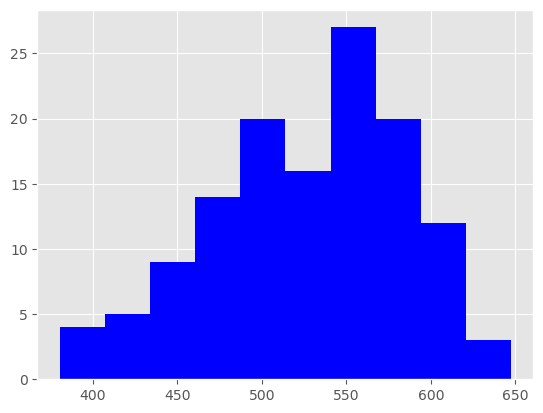

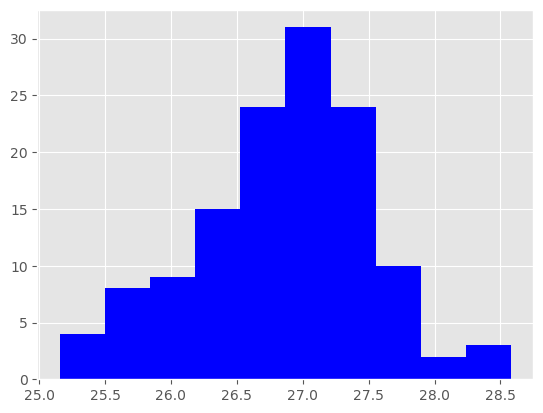

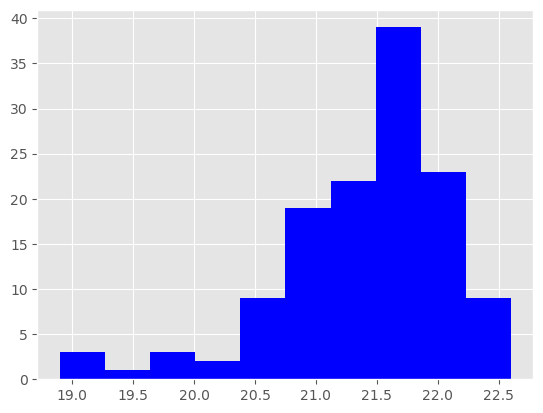

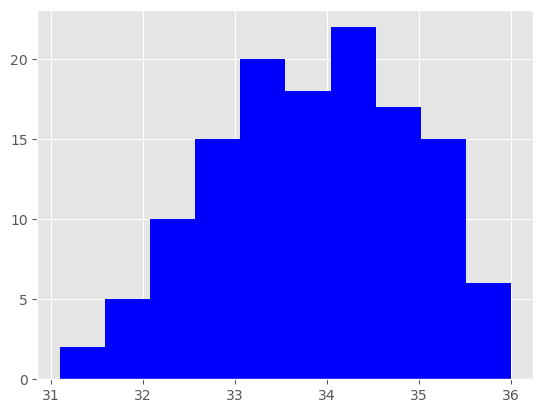

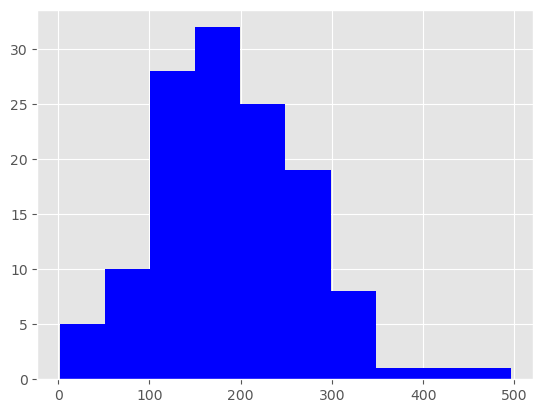

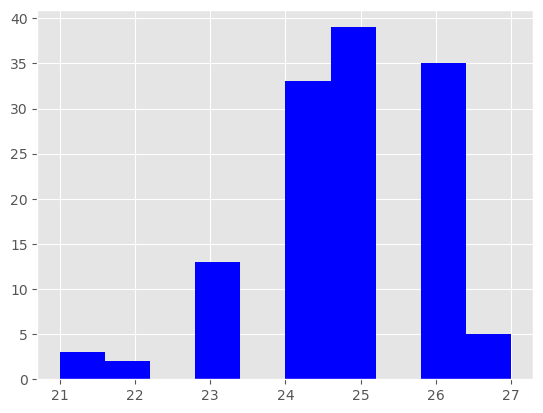

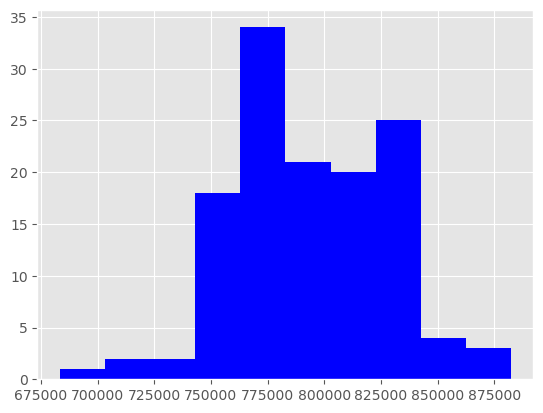

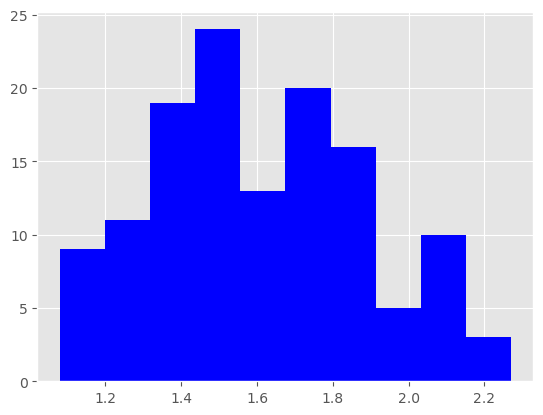

In [37]:
for i in df.columns:
    # print(df[i].dtype)
    if df[i].dtype == 'object' or df[i].dtype == 'str':
        continue
    plt.figure()
    plt.hist(df[i], color='blue')
   

## 4. Lets explore the only discrete variable we have called Working_days


## Caluate the counts of working_days and also make a plot of this 


ploting = df.groupby(['Working_days']).count()
ploting

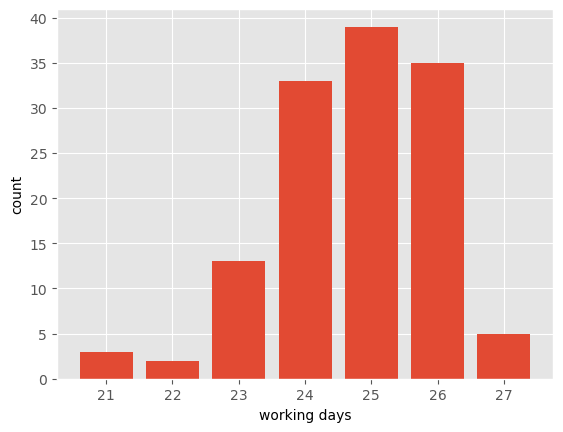

In [39]:
Working_days =[key for key,df in df.groupby('Working_days')]
plt.bar(Working_days,df.groupby('Working_days').count()['Date'])
plt.xlabel('working days')
plt.ylabel('count')
# plt.yticks(df.groupby('Working_days').count()['Date'])
plt.xticks(Working_days)
plt.show()

# Data distribution

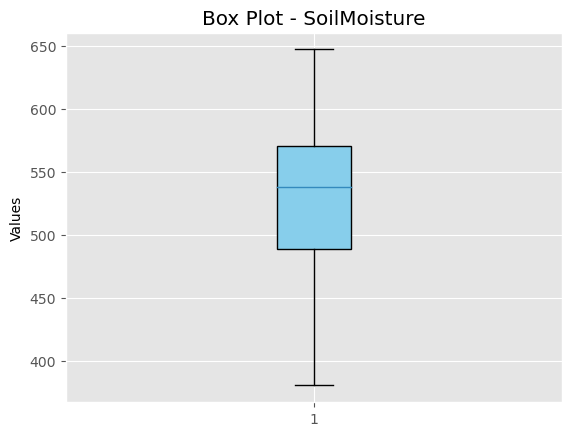

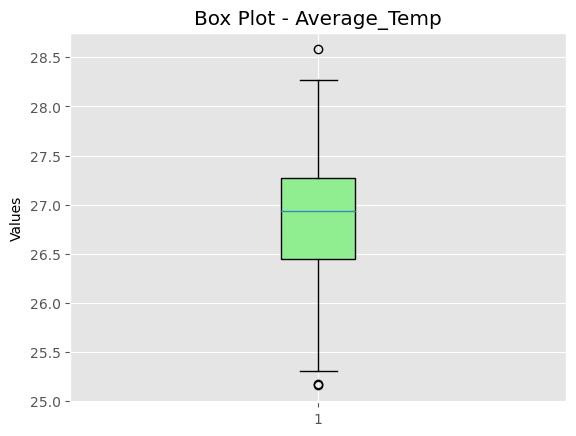

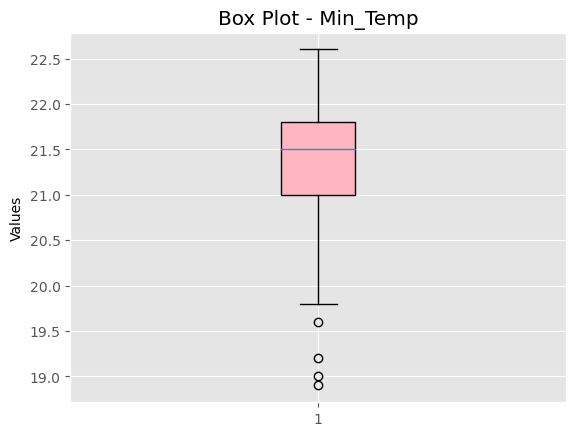

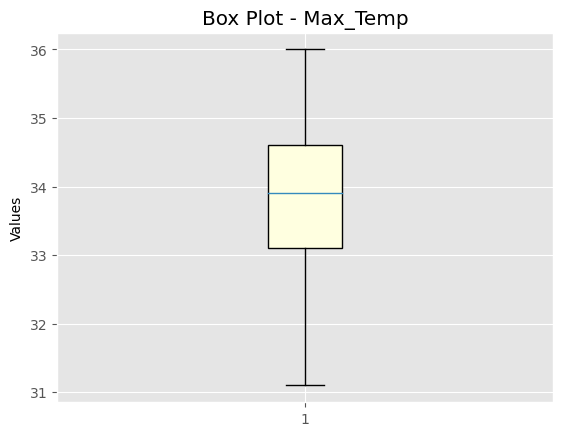

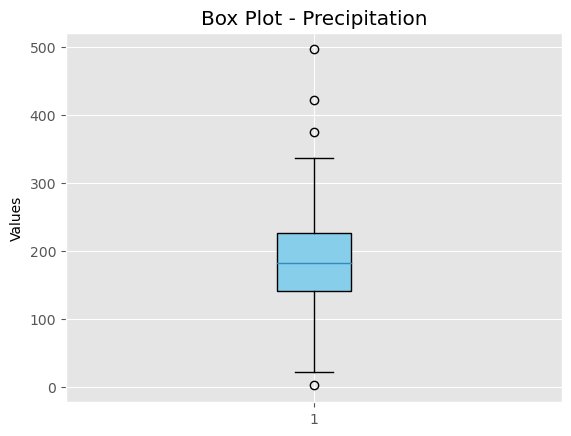

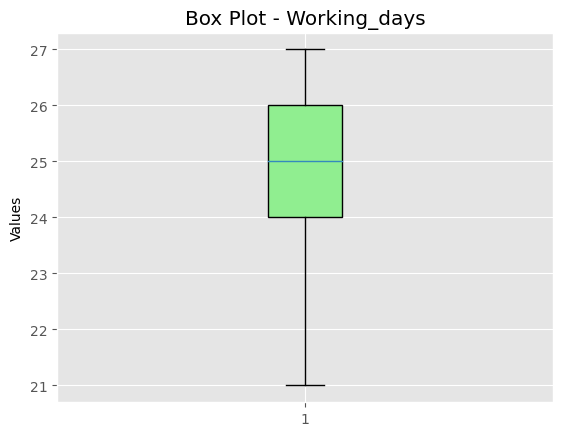

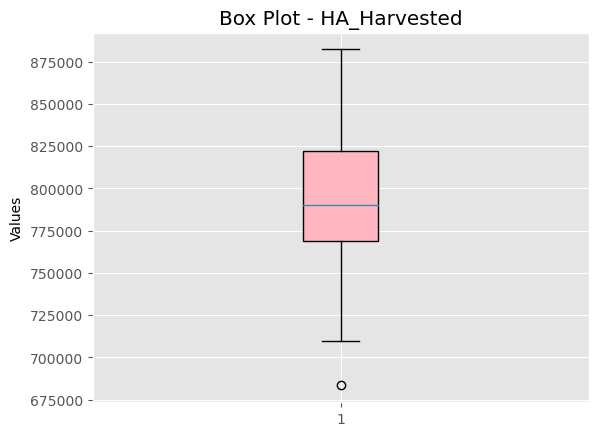

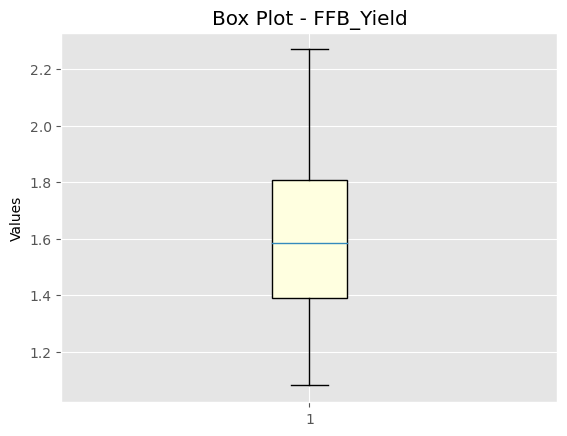

In [19]:
numeric_columns = df.select_dtypes(include=[np.number])

# Define custom colors for the box plots
colors = ['skyblue', 'lightgreen', 'lightpink', 'lightyellow']

# Create a box plot for each numeric column with custom colors
for i, column in enumerate(numeric_columns):
    plt.figure()
    plt.boxplot(df[column].dropna(), patch_artist=True, boxprops=dict(facecolor=colors[i % len(colors)]))
    plt.title('Box Plot - {}'.format(column))
    plt.ylabel('Values')
    plt.show()

## 6. Explore relationships between the FFB Yield and other features - Scatter/Pair Plots.


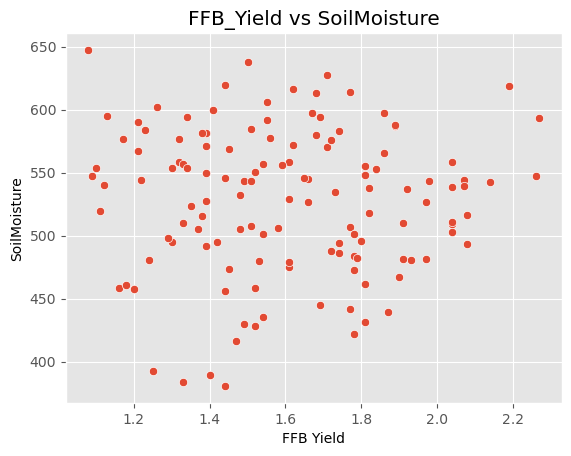

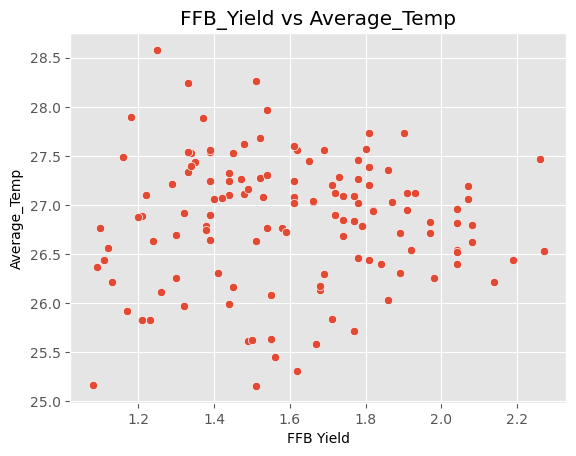

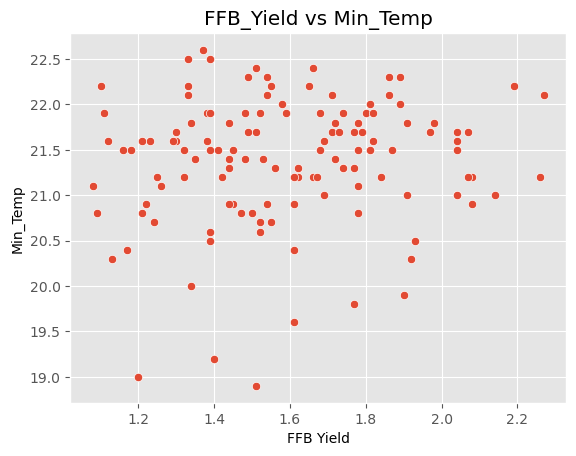

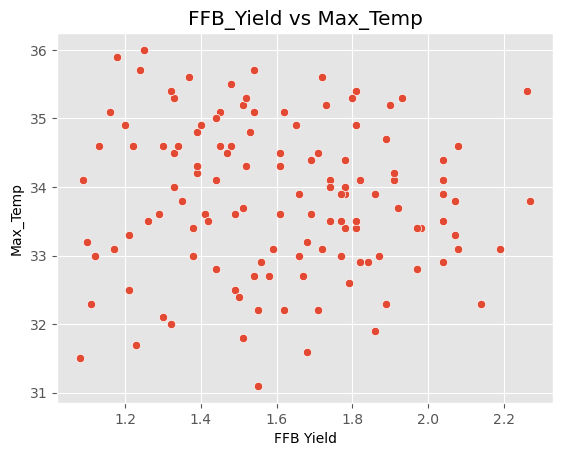

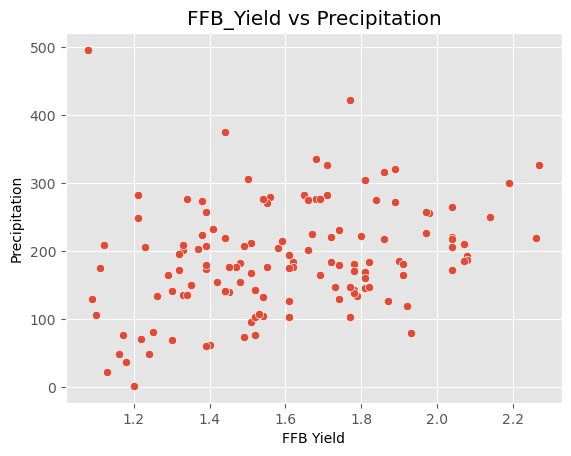

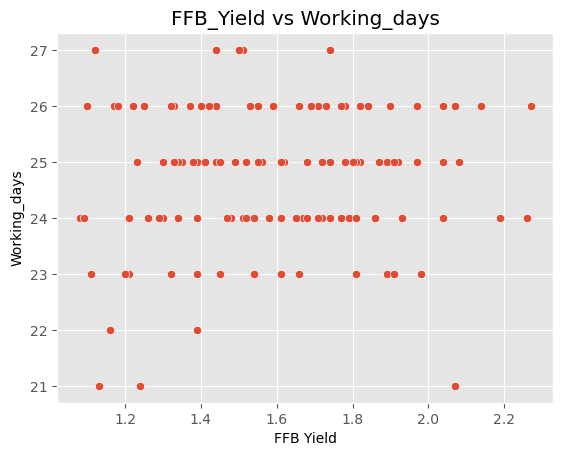

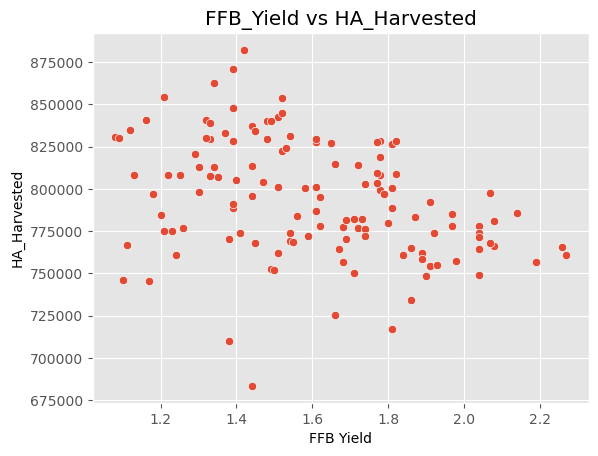

In [20]:
numeric_columns = df.select_dtypes(include=[np.number])
numeric_columns.drop('FFB_Yield', axis = 1, inplace = True)

for col in numeric_columns:
    sns.scatterplot(x='FFB_Yield', y=col, data=df)
    plt.title(('FFB_Yield vs {}'.format(col)))
    plt.xlabel('FFB Yield')
    plt.ylabel(col)
    plt.show()


## 7. Look for correlations among the features and also with the FFB_Yield, our target variable. 

A:\Users\SAM\AppData\Local\Temp\ipykernel_1948\1698422092.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


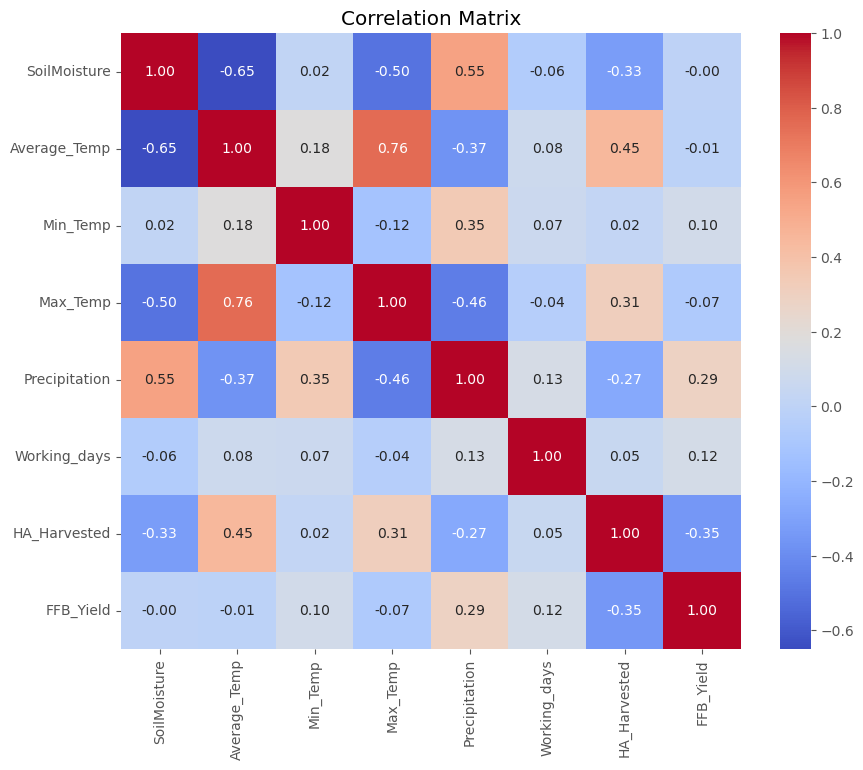

Correlation with FFB Yield:
Precipitation    0.289604
Working_days     0.116364
Min_Temp         0.103830
SoilMoisture    -0.003183
Average_Temp    -0.005494
Max_Temp        -0.071201
HA_Harvested    -0.350222
Name: FFB_Yield, dtype: float64


In [21]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Correlation with FFB Yield
correlation_ffb = correlation_matrix['FFB_Yield'].drop('FFB_Yield')
correlation_ffb = correlation_ffb.sort_values(ascending=False)

# Print correlation with FFB Yield
print('Correlation with FFB Yield:')
print(correlation_ffb)


# 8. Apply four different machine learning models with its evlauations through random splitting and through K=3 fold (cross validation) 

In [22]:
df = pd.read_csv('plantpalm.csv')

In [23]:
np.sort(df.FFB_Yield.unique())

array([1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.16, 1.17, 1.18, 1.2 , 1.21,
       1.22, 1.23, 1.24, 1.25, 1.26, 1.29, 1.3 , 1.32, 1.33, 1.34, 1.35,
       1.37, 1.38, 1.39, 1.4 , 1.41, 1.42, 1.44, 1.45, 1.47, 1.48, 1.49,
       1.5 , 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.58, 1.59, 1.61, 1.62,
       1.65, 1.66, 1.67, 1.68, 1.69, 1.71, 1.72, 1.73, 1.74, 1.77, 1.78,
       1.79, 1.8 , 1.81, 1.82, 1.84, 1.86, 1.87, 1.89, 1.9 , 1.91, 1.92,
       1.93, 1.97, 1.98, 2.04, 2.07, 2.08, 2.14, 2.19, 2.26, 2.27])

In [24]:
X = df.drop(['FFB_Yield','Date'],axis=1)
# X = X.drop('Date',axis=1,inplace=True)
y = df['FFB_Yield'] 

In [25]:
data = []
for i in y:
    if i < 1.5:
        data.append(1)
    elif i < 2:
        data.append(2)
    elif i < 2.5:
        data.append(3)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, data, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(91, 7) (39, 7)


In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)

y_pred=knn.predict(X_test)

print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",knn.score(X_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           1       0.50      0.46      0.48        13
           2       0.52      0.70      0.60        20
           3       0.00      0.00      0.00         6

    accuracy                           0.51        39
   macro avg       0.34      0.39      0.36        39
weighted avg       0.43      0.51      0.47        39

Confusion Matrix:
 [[ 6  7  0]
 [ 6 14  0]
 [ 0  6  0]]
Training Score:
 74.72527472527473
Mean Squared Error:
 0.48717948717948717
R2 score is:
 -0.07080924855491344


A:\Users\SAM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
A:\Users\SAM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
A:\Users\SAM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
#Fitting the model
d_tree = DecisionTreeClassifier()
d_tree.fit(X_train,y_train)

y_pred=d_tree.predict(X_test)

#Calculating different metrics
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",knn.score(X_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           1       0.60      0.69      0.64        13
           2       0.57      0.60      0.59        20
           3       0.33      0.17      0.22         6

    accuracy                           0.56        39
   macro avg       0.50      0.49      0.48        39
weighted avg       0.54      0.56      0.55        39

Confusion Matrix:
 [[ 9  4  0]
 [ 6 12  2]
 [ 0  5  1]]
Training Score:
 74.72527472527473
Mean Squared Error:
 0.4358974358974359
R2 score is:
 0.041907514450866934


In [30]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

y_pred=rf_estimator.predict(X_test)

#Calculating different metrics
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",knn.score(X_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           1       0.67      0.62      0.64        13
           2       0.59      0.80      0.68        20
           3       0.00      0.00      0.00         6

    accuracy                           0.62        39
   macro avg       0.42      0.47      0.44        39
weighted avg       0.53      0.62      0.56        39

Confusion Matrix:
 [[ 8  5  0]
 [ 4 16  0]
 [ 0  6  0]]
Training Score:
 74.72527472527473
Mean Squared Error:
 0.38461538461538464
R2 score is:
 0.1546242774566473


A:\Users\SAM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
A:\Users\SAM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
A:\Users\SAM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

y_pred=bagging_classifier.predict(X_test)

#Calculating different metrics
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",knn.score(X_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           1       0.59      0.77      0.67        13
           2       0.57      0.60      0.59        20
           3       0.00      0.00      0.00         6

    accuracy                           0.56        39
   macro avg       0.39      0.46      0.42        39
weighted avg       0.49      0.56      0.52        39

Confusion Matrix:
 [[10  3  0]
 [ 7 12  1]
 [ 0  6  0]]
Training Score:
 74.72527472527473
Mean Squared Error:
 0.4358974358974359
R2 score is:
 0.041907514450866934


In [ ]:
## Without Scalling 

In [32]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset from a CSV file


# Split the dataset into features (X) and target variable (y)
X = df.drop(['FFB_Yield','Date'], axis=1)  # Assuming 'ffb' is the target variable
y = df['FFB_Yield']

# Split the dataset into training and testing sets using random splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Evaluate Linear Regression using random splitting
y_pred_linear = linear_reg.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print("Linear Regression (Random Splitting) - MSE: {:.2f}, R^2: {:.2f}".format(mse_linear, r2_linear))

# Model 2: Decision Tree Regressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)

# Evaluate Decision Tree Regressor using random splitting
y_pred_tree = decision_tree.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
print("Decision Tree Regressor (Random Splitting) - MSE: {:.2f}, R^2: {:.2f}".format(mse_tree, r2_tree))

# Model 3: Random Forest Regressor
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)

# Evaluate Random Forest Regressor using random splitting
y_pred_forest = random_forest.predict(X_test)
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)
print("Random Forest Regressor (Random Splitting) - MSE: {:.2f}, R^2: {:.2f}".format(mse_forest, r2_forest))

# Model 4: Support Vector Regressor
svr = SVR()
svr.fit(X_train, y_train)

# Evaluate Support Vector Regressor using random splitting
y_pred_svr = svr.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print("Support Vector Regressor (Random Splitting) - MSE: {:.2f}, R^2: {:.2f}".format(mse_svr, r2_svr))

# Evaluate models using K-fold cross-validation (K=3)
models = [linear_reg, decision_tree, random_forest, svr]
model_names = ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'Support Vector Regressor']

for i, model in enumerate(models):
    cv_scores = cross_val_score(model, X, y, cv=3, scoring='neg_mean_squared_error')
    cv_scores = -cv_scores
    avg_mse = cv_scores.mean()
    print("{} (K-fold Cross Validation) - Average MSE: {:.2f}".format(model_names[i], avg_mse))

Linear Regression (Random Splitting) - MSE: 0.08, R^2: 0.03
Decision Tree Regressor (Random Splitting) - MSE: 0.07, R^2: 0.15
Random Forest Regressor (Random Splitting) - MSE: 0.05, R^2: 0.38
Support Vector Regressor (Random Splitting) - MSE: 0.08, R^2: 0.06
Linear Regression (K-fold Cross Validation) - Average MSE: 0.07
Decision Tree Regressor (K-fold Cross Validation) - Average MSE: 0.14
Random Forest Regressor (K-fold Cross Validation) - Average MSE: 0.06
Support Vector Regressor (K-fold Cross Validation) - Average MSE: 0.07


In [ ]:
## With Scalling

In [33]:
from sklearn.preprocessing import StandardScaler


X = df.drop(['FFB_Yield','Date'], axis=1)  
y = df['FFB_Yield']

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled features into training and testing sets using random splitting
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model 1: Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Evaluate Linear Regression using random splitting
y_pred_linear = linear_reg.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print("Linear Regression (Random Splitting) - MSE: {:.2f}, R^2: {:.2f}".format(mse_linear, r2_linear))

# Model 2: Decision Tree Regressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)

# Evaluate Decision Tree Regressor using random splitting
y_pred_tree = decision_tree.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
print("Decision Tree Regressor (Random Splitting) - MSE: {:.2f}, R^2: {:.2f}".format(mse_tree, r2_tree))

# Model 3: Random Forest Regressor
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)

# Evaluate Random Forest Regressor using random splitting
y_pred_forest = random_forest.predict(X_test)
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)
print("Random Forest Regressor (Random Splitting) - MSE: {:.2f}, R^2: {:.2f}".format(mse_forest, r2_forest))

# Model 4: Support Vector Regressor
svr = SVR()
svr.fit(X_train, y_train)

# Evaluate Support Vector Regressor using random splitting
y_pred_svr = svr.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print("Support Vector Regressor (Random Splitting) - MSE: {:.2f}, R^2: {:.2f}".format(mse_svr, r2_svr))

# Evaluate models using K-fold cross-validation (K=3)
models = [linear_reg, decision_tree, random_forest, svr]
model_names = ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'Support Vector Regressor']

for i, model in enumerate(models):
    cv_scores = cross_val_score(model, X_scaled, y, cv=3, scoring='neg_mean_squared_error')
    cv_scores = -cv_scores
    avg_mse = cv_scores.mean()
    print("{} (K-fold Cross Validation) - Average MSE: {:.2f}".format(model_names[i], avg_mse))


Linear Regression (Random Splitting) - MSE: 0.08, R^2: 0.03
Decision Tree Regressor (Random Splitting) - MSE: 0.07, R^2: 0.21
Random Forest Regressor (Random Splitting) - MSE: 0.05, R^2: 0.43
Support Vector Regressor (Random Splitting) - MSE: 0.04, R^2: 0.49
Linear Regression (K-fold Cross Validation) - Average MSE: 0.07
Decision Tree Regressor (K-fold Cross Validation) - Average MSE: 0.13
Random Forest Regressor (K-fold Cross Validation) - Average MSE: 0.06
Support Vector Regressor (K-fold Cross Validation) - Average MSE: 0.06
